In [18]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import tifffile
from pathlib import Path

In [23]:
sample_id = 'HT206B1_H1_06252022'
run_dir = f'/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/region_metrics/{sample_id}'
Path(run_dir).mkdir(parents=True, exist_ok=True)

In [3]:
a = sc.read_h5ad(f'../../multiplex_data/analysis/brca_dcis_v1/metaclustered/{sample_id}.h5ad')
a.obs

,area,perimeter,bbox_row_min,bbox_col_min,bbox_row_max,bbox_col_max,centroid_row,centroid_col,eccentricity,DAPI intensity max,...,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,metacluster
HT206B1_H1_06252022_1,380,74.041631,0,4821,19,4846,7.505263,4832.971053,0.683004,18790.0,...,0.000000,0.618568,0.019604,0.000000,0.010007,0.000000,0.000000,0.000000,0.303525,Endothelial
HT206B1_H1_06252022_2,310,70.627417,0,4845,16,4868,6.541935,4856.164516,0.722101,61606.0,...,0.000000,0.743646,0.023065,0.000000,0.011769,0.000000,0.000000,0.010209,0.164716,Endothelial
HT206B1_H1_06252022_3,278,80.870058,0,4867,14,4897,4.733813,4879.276978,0.931353,24283.0,...,0.000000,0.821627,0.017061,0.000000,0.000000,0.000000,0.000000,0.000000,0.110602,Endothelial
HT206B1_H1_06252022_4,833,111.941125,0,5634,25,5674,10.346939,5653.015606,0.774127,35152.0,...,0.032994,0.029690,0.078039,0.031300,0.039833,0.031215,0.032178,0.034552,0.660189,Tumor
HT206B1_H1_06252022_5,592,92.769553,0,5721,24,5753,9.847973,5735.261824,0.674520,51562.0,...,0.000000,0.000000,0.019633,0.556573,0.010007,0.000000,0.000000,0.000000,0.365894,Macrophage M1 enriched
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HT206B1_H1_06252022_136402,48,32.349242,20149,10223,20157,10236,20152.750000,10230.020833,0.877933,6102.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.969482,Tumor
HT206B1_H1_06252022_136403,222,73.627417,20150,10913,20160,10942,20155.333333,10927.900901,0.945689,18912.0,...,0.000000,0.000000,0.010322,0.000000,0.000000,0.000000,0.000000,0.000000,0.955039,Tumor
HT206B1_H1_06252022_136404,108,59.798990,20152,10212,20160,10236,20156.500000,10223.629630,0.952507,15680.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.965823,Tumor
HT206B1_H1_06252022_136405,56,33.556349,20154,10458,20160,10473,20157.357143,10465.946429,0.931476,14481.0,...,0.000000,0.000000,0.011221,0.000000,0.000000,0.000000,0.000000,0.000000,0.951174,Tumor


In [6]:
feats = a.obs[['centroid_col', 'centroid_row', 'harmonized_cell_type', 'metacluster']]
feats.columns = ['X', 'Y', 'cell_type', 'metacluster']
feats.index.name = 'cell_id'
feats

,X,Y,cell_type,metacluster
cell_id,,,,
HT206B1_H1_06252022_1,4832.971053,7.505263,Fibroblast,Endothelial
HT206B1_H1_06252022_2,4856.164516,6.541935,Endothelial,Endothelial
HT206B1_H1_06252022_3,4879.276978,4.733813,Endothelial,Endothelial
HT206B1_H1_06252022_4,5653.015606,10.346939,Tumor,Tumor
HT206B1_H1_06252022_5,5735.261824,9.847973,Tumor,Macrophage M1 enriched
...,...,...,...,...
HT206B1_H1_06252022_136402,10230.020833,20152.750000,Tumor,Tumor
HT206B1_H1_06252022_136403,10927.900901,20155.333333,Tumor,Tumor
HT206B1_H1_06252022_136404,10223.629630,20156.500000,Tumor,Tumor


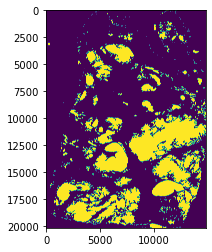

In [24]:
tumor_regions_tif = f'/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/{sample_id}/level_3/annotations/tumor_mask_10_alpha.tif'
tumor_regions = tifffile.imread(tumor_regions_tif)
plt.imshow(tumor_regions)

In [15]:
channel_dict = {
    'SMA': [1500],
    'Podoplanin': [5000]
}
channel_df = pd.DataFrame(channel_dict).transpose()
channel_df.index.name = 'channel'
channel_df.columns = ['threshold']
channel_df

,threshold
channel,
SMA,1500
Podoplanin,5000


In [25]:
input_dir = os.path.join(run_dir, 'inputs')
Path(input_dir).mkdir(parents=True, exist_ok=True)

In [26]:
feats_fp = os.path.join(input_dir, 'spatial_features.txt')
feats.to_csv(feats_fp, sep='\t')

In [27]:
channel_fp = os.path.join(input_dir, 'channel_thresholds.txt')
channel_df.to_csv(channel_fp, sep='\t')

In [31]:
ome_tiff_fp = '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/HT206B1_H1_06252022.ome.tiff'

In [29]:
out_dir = os.path.join(run_dir, 'outputs')
Path(input_dir).mkdir(parents=True, exist_ok=True)

In [32]:
command = f'mip generate-region-features --spatial-features {feats_fp} \
--ome-tiff {ome_tiff_fp} --regions-mask {tumor_regions_tif} --channel-thresholds {channel_fp} \
--output-dir {out_dir} --max-region-size 50000'

command

'mip generate-region-features --spatial-features /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/region_metrics/HT206B1_H1_06252022/inputs/spatial_features.txt --ome-tiff /diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/HT206B1_H1_06252022.ome.tiff --regions-mask /diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_3/annotations/tumor_mask_10_alpha.tif --channel-thresholds /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/region_metrics/HT206B1_H1_06252022/inputs/channel_thresholds.txt --output-dir /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/region_metrics/HT206B1_H1_06252022/outputs --max-region-size 50000'